In [1]:
%matplotlib inline
import pickle
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
def parse_f1(result):
    rows = result.split('\n')
    mat = list(map(lambda r: r.split('     '), rows))
    f1 = float(mat[-2][-2])
    return f1

In [3]:
fit_history = pickle.load(open('/home/ec2-user/datadrive/models/conll-2003/fit_history.p', 'rb'))

In [5]:
fit_history.keys()

dict_keys(['init', 'init_pct', 'late_reset_lt_1_pct', 'late_reset_lt_2_pct', 'late_reset_lt_3_pct', 'late_reset_lt_4_pct', 'late_reset_lt_5_pct', 'late_reset_lt_6_pct', 'late_reset_lt_7_pct', 'late_reset_lt_1', 'late_reset_lt_2', 'late_reset_lt_3', 'late_reset_lt_4', 'late_reset_lt_5', 'late_reset_lt_6', 'late_reset_lt_7'])

In [62]:
pct_keys = list(filter(lambda t: 'pct' in t, fit_history.keys()))
hist_keys = list(filter(lambda t: 'pct' not in t, fit_history.keys()))

for k in pct_keys:
    print(fit_history[k])
    
# for k in hist_keys:
#     print(len(fit_history[k]))

1.0
0.6732250823288359
0.46464134098227333
0.330362023755747
0.24291442640594982
0.18508893669524498
0.14609434894007806
0.1191544565668915


In [25]:
f1_init = list(map(parse_f1, fit_history['init']))
f1_1 = list(map(parse_f1, fit_history['late_reset_lt_1']))
f1_2 = list(map(parse_f1, fit_history['late_reset_lt_2']))
f1_3 = list(map(parse_f1, fit_history['late_reset_lt_3']))
f1_4 = list(map(parse_f1, fit_history['late_reset_lt_4']))
f1_5 = list(map(parse_f1, fit_history['late_reset_lt_5']))
f1_6 = list(map(parse_f1, fit_history['late_reset_lt_6']))
f1_7 = list(map(parse_f1, fit_history['late_reset_lt_7']))
# plt.plot(f1_init)

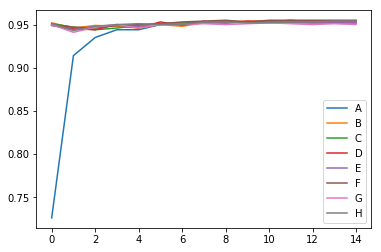

In [33]:
f1_df = pd.DataFrame({
    'A': f1_init,
    'B': f1_1,
    'C': f1_2,
    'D': f1_3,
    'E': f1_4,
    'F': f1_5,
    'G': f1_6,
    'H': f1_7,
})
f1_matrix = f1_df.as_matrix()
f1_df.plot()

Text(0.5,1,'Winning Tickets (BERT, CoNLL-2003)')

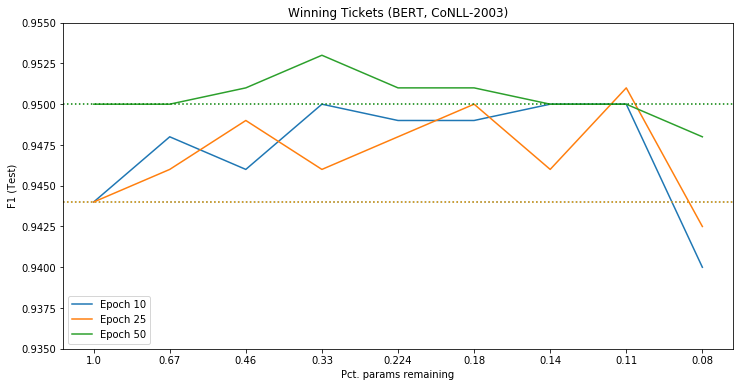

In [114]:
levels = [1.0,0.67,0.46,0.33,0.224,0.18,0.14,0.11,0.08]
plt.plot(np.concatenate((f1_matrix[3,:],[.94])), label='Epoch 10')
plt.axhline(f1_matrix[3,0], linestyle=':')
plt.plot(np.concatenate((f1_matrix[4,:],[.9425])), label='Epoch 25')
plt.axhline(f1_matrix[4,0], linestyle=':', color='orange')
plt.plot(np.concatenate((f1_matrix[5,:],[.948])), label='Epoch 50')
plt.axhline(f1_matrix[5,0], linestyle=':', color='green')
plt.rcParams['figure.figsize'] = 12, 6
plt.xticks([i for i in range(9)], levels)
# plt.xlim(9., 0)
plt.ylim(.935,.955)
plt.ylabel('F1 (Test)')
plt.xlabel('Pct. params remaining')
plt.legend(loc='lower left')
plt.title('Winning Tickets (BERT, CoNLL-2003)')